<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad4/Practica_2_Clustering_de_Frutas_con_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 4

### Practica 2: **Clustering de Frutas con K-Means**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

## **Clustering de Frutas con K-Means**

**Objetivo:**  

* **Agrupar frutas** automáticamente usando K-Means, sin usar sus etiquetas reales (clustering no supervisado).
* Luego visualizar los clusters y compararlos con la clase real para ver qué tan bien separa el algoritmo a las frutas.

### **Cargar librerías y dataset Frutas**

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

frutas = pd.read_csv("frutas.csv")
frutas.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### **Selección de variables relevantes**


In [117]:
features = ['mass', 'width', 'height', 'color_score']

X = frutas[features]
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


### **Escalamiento de las variables**

In [118]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Determinamos el número óptimo de clústeres (método del codo)**

**1. Eligir cuántos grupos quieres (k)**. Por ejemplo, si quieres 3 grupos, el algoritmo intentará dividir los datos en 3 clusters.  
**2. Colocar puntos iniciales (centroides)**. Son como “centros” provisionales de cada grupo.  
**3. Asignar cada dato al centro más cercano**. Se calcula la distancia (normalmente euclidiana) y cada punto se va al cluster cuyo centro esté más cerca.  
**4. Recalcular los centros**. Para cada grupo, el centro se mueve al promedio de todos los puntos que tiene.  
**5. Repetir**. Vuelve a asignar puntos y recalcular centros hasta que los grupos ya no cambien mucho (convergencia).  

**Idea clave:**  
K-Means agrupa datos minimizando la distancia dentro de cada grupo. Los clusters son “compactos” y separados entre sí.

**El método del codo (Elbow Method) es una técnica muy usada para determinar el número óptimo de clústeres en K-Means.**

1. Entrena K-Means con diferentes valores de *k*
    * Por ejemplo, prueba k = 1,2,3,…,10
2. Calcula la suma de errores cuadráticos (SSE o Inertia)
    * SSE = suma de las distancias al cuadrado entre cada punto y su centroide.
    * A medida que aumenta *k*, SSE disminuye porque los clusters son más pequeños.
3. Grafica SSE vs. número de clusters (k)
    * El gráfico muestra una curva decreciente.
    * Al inicio, la reducción de SSE es grande, pero después se vuelve marginal.
4. Identifica el “codo” de la curva
    * El punto donde la mejora empieza a ser mínima, **ese *k* es el número óptimo de clusters**.


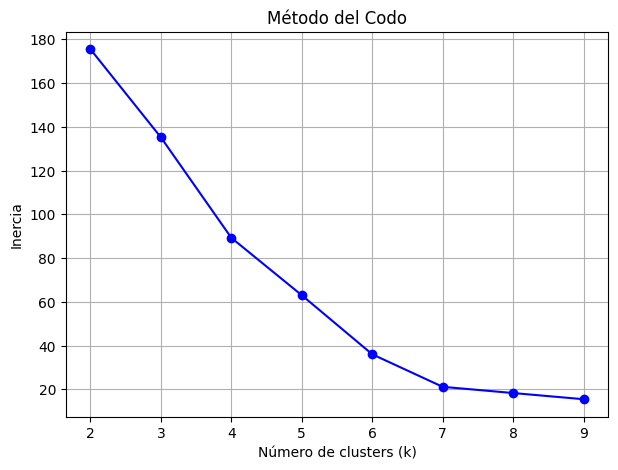

In [119]:
# --- Determinamos el número óptimo de clústeres (método del codo) ---
inertias = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertias, "bo-")
plt.title("Método del Codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

In [120]:
# --- Aplicamos K-Means con el valor de k elegido (4) ---
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
frutas["cluster"] = clusters

print("\nDistribución de frutas antes de PCA:")
print(frutas.groupby("fruit_name").size())

print("\nDistribución de frutas por cluster:")
print(frutas.groupby("cluster").size())


Distribución de frutas antes de PCA:
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

Distribución de frutas por cluster:
cluster
0    22
1    19
2     5
3    13
dtype: int64


### **Mejorar el desempeño de K-Means**

**K-Means funciona mejor cuando:**
* No hay alta correlación entre variables.  
* Los datos están en espacios pequeños y limpios.  

**PCA ayuda:**
* Eliminando correlaciones.
* Eliminando ruido.
* Haciendo que los clusters sean más esféricos → K-Means se ajusta mejor.

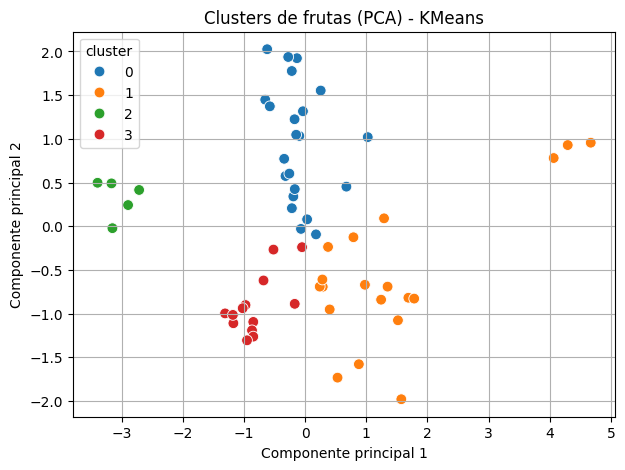

In [121]:
# --- Visualización PCA con 2 componentes (Análisis de Componentes Principales) ---

pca = PCA(n_components=2)  # definimos PCA con 2 componentes
pca_result = pca.fit_transform(X_scaled)
frutas["pca1"] = pca_result[:, 0]
frutas["pca2"] = pca_result[:, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=frutas, x="pca1", y="pca2", hue="cluster", palette="tab10", s=60)
plt.title("Clusters de frutas (PCA) - KMeans")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

### **Comparar con la etiqueta real**

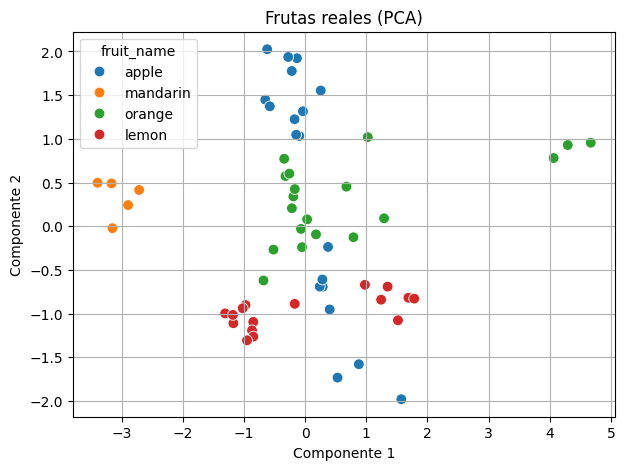

In [122]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=frutas["pca1"],
    y=frutas["pca2"],
    hue=frutas["fruit_name"],
    palette="tab10",
    s=60
)
plt.title("Frutas reales (PCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()

### **Análisis descriptivo de cada clúster**

In [123]:
# --- Análisis descriptivo de cada clúster ---
resumen = frutas.groupby("cluster")[features].mean().round(2)
print("\nPromedios por clúster:\n", resumen)



Promedios por clúster:
            mass  width  height  color_score
cluster                                    
0        163.00   7.29    7.47         0.83
1        208.63   7.78    8.61         0.70
2         81.20   5.94    4.38         0.80
3        128.31   6.25    8.01         0.72


## **Interpretacion**

| cluster | mass   | width | height | color_score |
| ------- | ------ | ----- | ------ | ----------- |
| **0**   | 163.00 | 7.29  | 7.47   | **0.83**    |
| **1**   | 208.63 | 7.78  | 8.61   | 0.70        |
| **2**   | 81.20  | 5.94  | 4.38   | 0.80        |
| **3**   | 128.31 | 6.25  | 8.01   | 0.72        |

#### **Cluster 1 — Frutas grandes y pesadas (probablemente manzanas rojas o pomelos)**
Promedios:
* **mass** ≈ 208 g → fruta grande
* **width** ≈ 7.8 cm
* **height** ≈ 8.6 cm (la más alta).  
* **color_score** ≈ 0.70 → tono moderado (no muy rojo).  
Este clúster agrupa las frutas más grandes y pesadas del dataset.

Es muy probable que incluya manzanas grandes o pomelos (si estaban en el dataset).

#### **Cluster 0 — Frutas medianas y con mucho color (probables manzanas rojas)**

Promedios:
* **mass**: 163 g
* **width/height**: ~7.3 / 7.5 cm
* **color_score**: 0.83 (más alto de todos)

* Son frutas de tamaño medio.
* Tienen el color score más alto → muy rojas o naranjas.
* Muy posiblemente: manzanas rojas.

#### **Cluster 2 — Frutas pequeñas (probables mandarinas o limones)**

Promedios:
* **mass**: 81 g → las más pequeñas
* **width**: 5.9 cm
* **height**: 4.4 cm (muy bajas)
* **color_score**: 0.80 → buen color  

Este grupo tiene las frutas más pequeñas, probablemente:
* Mandarinas
* Limones pequeños

#### **Cluster 3 — Frutas alargadas (probables peras)**

Promedios:
* **mass**: 128 g
* **width**: 6.25 cm
* **height**: 8.0 cm → altas y relativamente estrechas
* **color_score**: 0.72  

Este clúster tiene relación ancho < altura → frutas más alargadas.
* Esto coincide con peras, que suelen ser:
* más altas,
* menos anchas,
* masa media.

✔ Cluster de frutas alargadas — probablemente peras.



## **Comparacion de k-means sin PCA y con PCA**

In [124]:
# K-Means sin PCA (datos originales)
kmeans_original = KMeans(n_clusters=4, random_state=42)
clusters_original = kmeans_original.fit_predict(X_scaled)

frutas["cluster_original"] = clusters_original


In [125]:
# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Varianza explicada por PC1 y PC2:", pca.explained_variance_ratio_)

# K-Means después del PCA
kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

frutas["cluster_pca"] = clusters_pca

Varianza explicada por PC1 y PC2: [0.57845054 0.25650171]


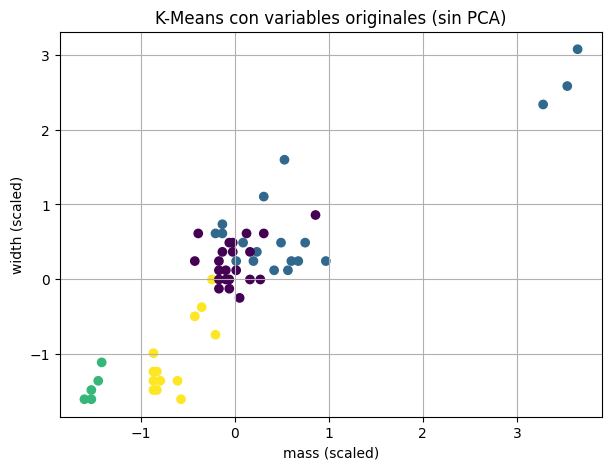

In [126]:
# Visualización: Clústeres antes de PCA

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters_original, cmap='viridis')
plt.xlabel("mass (scaled)")
plt.ylabel("width (scaled)")
plt.title("K-Means con variables originales (sin PCA)")
plt.grid(True)
plt.show()


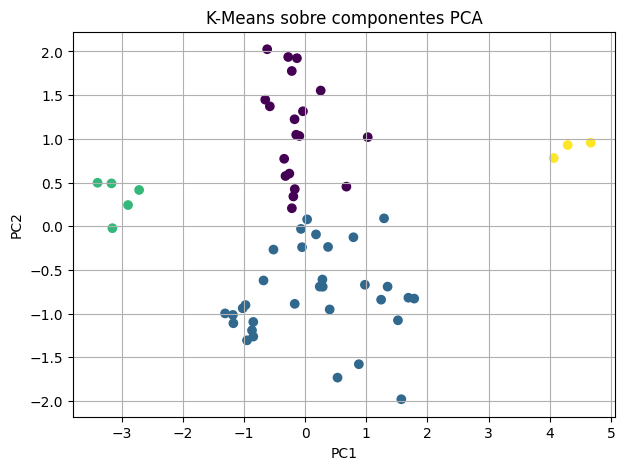

In [127]:
# Visualización: Clústeres después de PCA ( PC1-PC2)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_pca, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means sobre componentes PCA")
plt.grid(True)
plt.show()



### **Comparación de los clústeres**

* **Tablas de contingencia** (qué cambió de un método al otro).
* **crosstab() se utiliza para calcular una tabla de contingencia** (o tabla cruzada) que muestra la frecuencia de **combinaciones entre dos o más variables categóricas** en un DataFrame.
* En otras palabras, sirve para contar cuántas veces ocurre cada combinación de valores entre columnas específicas.
* Se usa para creación de tablas de frecuencia para reportes.

In [128]:
frutas.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,cluster,pca1,pca2,cluster_original,cluster_pca
0,1,apple,granny_smith,192,8.4,7.3,0.55,1,1.572169,-1.980044,1,1
1,1,apple,granny_smith,180,8.0,6.8,0.59,1,0.878417,-1.579373,1,1
2,1,apple,granny_smith,176,7.4,7.2,0.60,1,0.529773,-1.732891,1,1
3,2,mandarin,mandarin,86,6.2,4.7,0.80,2,-2.712610,0.414674,2,2
4,2,mandarin,mandarin,84,6.0,4.6,0.79,2,-2.893412,0.242003,2,2


In [129]:
# Generar Tablas de Contingencia
pd.crosstab(frutas["cluster_original"], frutas["cluster_pca"])

cluster_pca,0,1,2,3
cluster_original,,,,
0,19,3,0,0
1,0,16,0,3
2,0,0,5,0
3,0,13,0,0


### **Interpretación**

**La tabla de contingencia compara:**
* **Filas**: clústeres formados con datos originales (sin PCA).  
* **Columnas**: clústeres formados en el espacio PCA (PC1 y PC2).  

Cada celda indica cuántas observaciones coincidieron entre un clúster original y uno transformado.


| cluster_original | PCA-0  | PCA-1  | PCA-2 | PCA-3 |
| ---------------- | ------ | ------ | ----- | ----- |
| 0                | **19** | 3      | 0     | 0     |
| 1                | 0      | **16** | 0     | 3     |
| 2                | 0      | 0      | **5** | 0     |
| 3                | 0      | 13     | 0     | 0     |  

* **Clúster original 0** → principalmente PCA-0
  * 19 elementos del clúster 0 ahora están en PCA-0
  * solo 3 se fueron a PCA-1
  * Alta consistencia (19 de 22 ≈ 86%)*
* **Clúster original 1** → se divide entre PCA-1 y PCA-3
  * 16 se quedan en PCA-1
  * 3 se mueven a PCA-3
  * Este grupo es moderadamente estable.
* **Clúster original 2** → coincide totalmente con PCA-2
  * 5 de 5 elementos se quedan juntos
  * Clúster extremadamente estable.
  * Este grupo es muy compacto y bien definido en el espacio original y en PCA.
  * PCA no modifica su estructura.
* **Clúster original 3** → se mueve completamente a PCA-1
  * 13 elementos pasan a PCA-1
  * Ninguno cae en PCA-3 o PCA-0
  * Este grupo es inestable.
  * K-Means sin PCA formó este cluster, pero PCA revela que realmente pertenecen al mismo grupo que el clúster 1.
  * **Es decir, PCA está corrigiendo o eliminando un clúster artificial, pero.....**

* ¿Qué significa que PCA haya “colapsado” ese clúster y lo haya fusionado con otro?
* ¿Debo usar el clustering con PCA o sin PCA?
* ¿Cómo interpretar esto en un reporte?  

**PCA NO SIEMPRE mejora el clustering**

* PCA es útil cuando las variables están muy correlacionadas y agregan ruido.
* Pero en algunos casos:
  * Reduce dimensiones importantes
  * “Aplasta” diferencias sutiles entre clases reales
  * Hace que dos grupos distintos parezcan uno solo
  
**Si el objetivo es obtener grupos REALISTAS según la fruta**
* Usa K-Means sin PCA.

**Si el objetivo es reducir dimensiones o visualizar**
* Usa PCA para ver la estructura general.

------------------------------------------



## **Comparar silueta**

* **silhouette_score, calcula el índice de silueta** para evaluar la calidad de los clusters antes y después de aplicar PCA.
* Si la puntuación mejora con PCA → los clusters después de PCA son más compactos y mejor separados.
* **Sin PCA**, K-Means separa los grupos usando toda la información, incluidas correlaciones entre mass, width y height.
* **Con PCA**, K-Means trabaja en un espacio reducido donde:
  * PC1 → tamaño de la fruta
  * PC2 → color/madurez

**Interpretación del índice de silueta:**
* Va de -1 a 1.
* Cercano a 1: los puntos están bien agrupados y separados.
* Cercano a 0: los clusters se solapan.
* Negativo: los puntos están mal asignados.


In [130]:
from sklearn.metrics import silhouette_score

score_original = silhouette_score(X_scaled, clusters_original)
score_pca = silhouette_score(X_pca, clusters_pca)

print("Silueta sin PCA: ", score_original)
print("Silueta con PCA: ", score_pca)


Silueta sin PCA:  0.39419522739862123
Silueta con PCA:  0.4858531414482384


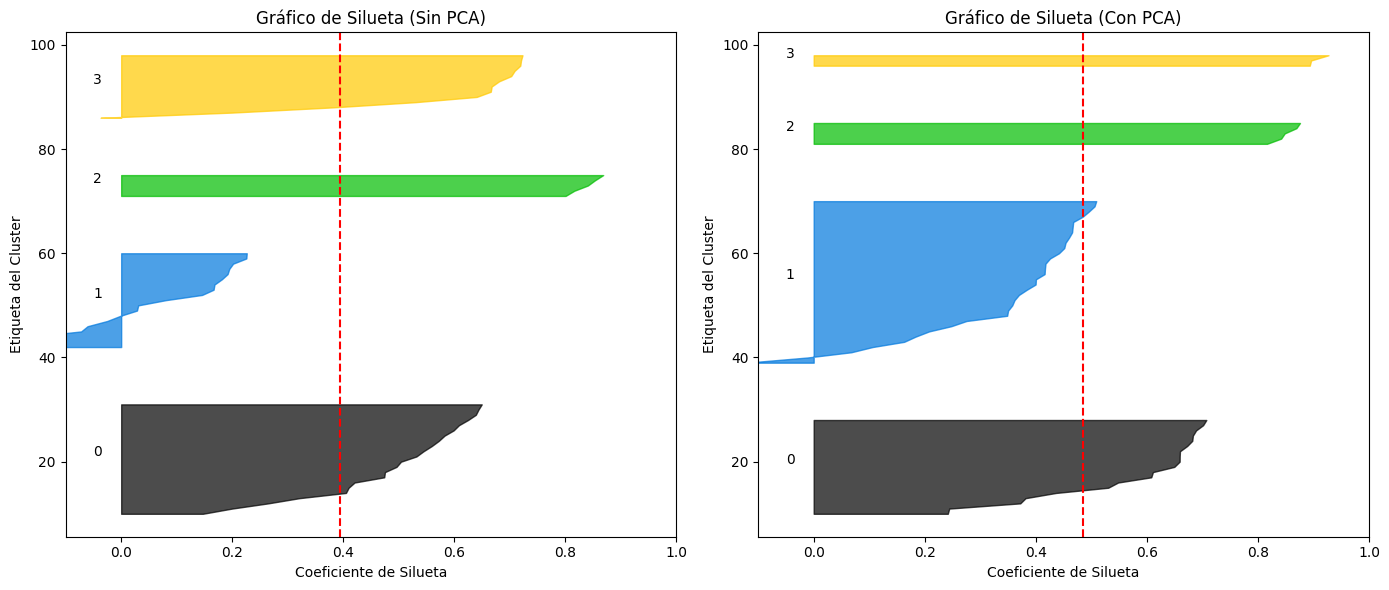

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

# Calcula valores de silueta para cada muestra
silhouette_vals_original = silhouette_samples(X_scaled, clusters_original)
silhouette_vals_pca = silhouette_samples(X_pca, clusters_pca)

# Número de clusters
n_clusters_original = len(np.unique(clusters_original))
n_clusters_pca = len(np.unique(clusters_pca))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gráfico sin PCA ---
y_lower = 10
for i in range(n_clusters_original):
    ith_cluster_silhouette_values = silhouette_vals_original[clusters_original == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / n_clusters_original)
    axes[0].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    axes[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[0].axvline(x=np.mean(silhouette_vals_original), color="red", linestyle="--")
axes[0].set_title("Gráfico de Silueta (Sin PCA)")
axes[0].set_xlabel("Coeficiente de Silueta")
axes[0].set_ylabel("Etiqueta del Cluster")
axes[0].set_xlim([-0.1, 1])

# --- Gráfico con PCA ---
y_lower = 10
for i in range(n_clusters_pca):
    ith_cluster_silhouette_values = silhouette_vals_pca[clusters_pca == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / n_clusters_pca)
    axes[1].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    axes[1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[1].axvline(x=np.mean(silhouette_vals_pca), color="red", linestyle="--")
axes[1].set_title("Gráfico de Silueta (Con PCA)")
axes[1].set_xlabel("Coeficiente de Silueta")
axes[1].set_ylabel("Etiqueta del Cluster")
axes[1].set_xlim([-0.1, 1])

plt.tight_layout()
plt.show()


### **Como interpretar un gráfico de siliueta**

#### **Línea roja vertical**
* Promedio global del coeficiente de silueta.

#### **La altura (vertical)**
* Representa el número de puntos en ese cluster.
* Por lo tanto:
  * Clusters altos → contienen más observaciones.
  * Clusters bajos → son clusters pequeños.
  * **Por Ejemplo:**
    * Cluster 3 sin PCA es más bajo → pocos puntos.
    * Con PCA es más alto → más puntos asignados a ese cluster (o cambio en distribución).

#### **Ancho (horizontal)**
* Representa el rango de coeficientes de silueta dentro del cluster.
* **Más ancho hacia la derecha** = puntos bien agrupados (cercanos a 1).
* **Más ancho hacia la izquierda** = puntos mal asignados (cercanos a 0 o negativos).
* **Por Ejemplo:**
  * Cluster 3 sin PCA: ancho moderado (0.2 a 0.8) → buena calidad.
  * Con PCA: más ancho y desplazado hacia la derecha (0.4 a 0.9) → mejor calidad.   

#### **Forma (curvatura o inclinación)**
* Indica dispersión interna:
  * Si la barra es recta y uniforme → todos los puntos tienen siluetas similares → cluster homogéneo.
  * Si la barra es muy inclinada → hay puntos muy buenos y otros muy malos → cluster heterogéneo.
  * Ejemplo:
    * Cluster 1 sin PCA: inclinación fuerte y valores negativos → mala cohesión.
    * Con PCA: más uniforme y sin negativos → mejora significativa.


### **Interpretación de Gráficos de Silueta**

| Cluster          | Sin PCA (Izquierda)                                                                                                                          | Con PCA (Derecha)                                                                                                               |
| ---------------- | -------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **0 (gris)**     | **Altura:** Muy alto → cluster grande.<br>**Ancho:** 0 a \~0.6 → calidad moderada.<br>**Forma:** Inclinada, algunos negativos → heterogéneo. | **Altura:** Similar.<br>**Ancho:** 0.1 a \~0.6 → mejora ligera.<br>**Forma:** Menos negativos → más cohesión.                   |
| **1 (azul)**     | **Altura:** Bajo → cluster pequeño.<br>**Ancho:** -0.05 a \~0.3 → mala calidad.<br>**Forma:** Muy inclinada → puntos mal asignados.          | **Altura:** Más alto → cluster creció.<br>**Ancho:** 0.1 a \~0.6 → mejora clara.<br>**Forma:** Más uniforme → menos dispersión. |
| **2 (verde)**    | **Altura:** Medio.<br>**Ancho:** 0.4 a \~0.8 → buena calidad.<br>**Forma:** Relativamente uniforme.                                          | **Altura:** Similar.<br>**Ancho:** 0.5 a \~0.8 → mantiene buena calidad.<br>**Forma:** Muy estable.                             |
| **3 (amarillo)** | **Altura:** Bajo → cluster pequeño.<br>**Ancho:** 0.3 a \~0.8 → buena calidad.<br>**Forma:** Uniforme.                                       | **Altura:** Más alto → cluster creció.<br>**Ancho:** 0.4 a \~0.9 → excelente calidad.<br>**Forma:** Muy uniforme.               |

***

### **Conclusiones**

*   **Cluster 1** es el que más mejora con PCA (menos negativos, más cohesión).
*   **Cluster 3** pasa de pequeño a más grande y mejora su calidad.
*   **Cluster 0** sigue siendo el más grande, pero PCA reduce los puntos mal asignados.
*   **Cluster 2** se mantiene estable y bien definido.

***La calidad global de la silueta mejora (línea roja se mueve a ~0.48).***


## **Comparar K-means con PCA y sin PCA**

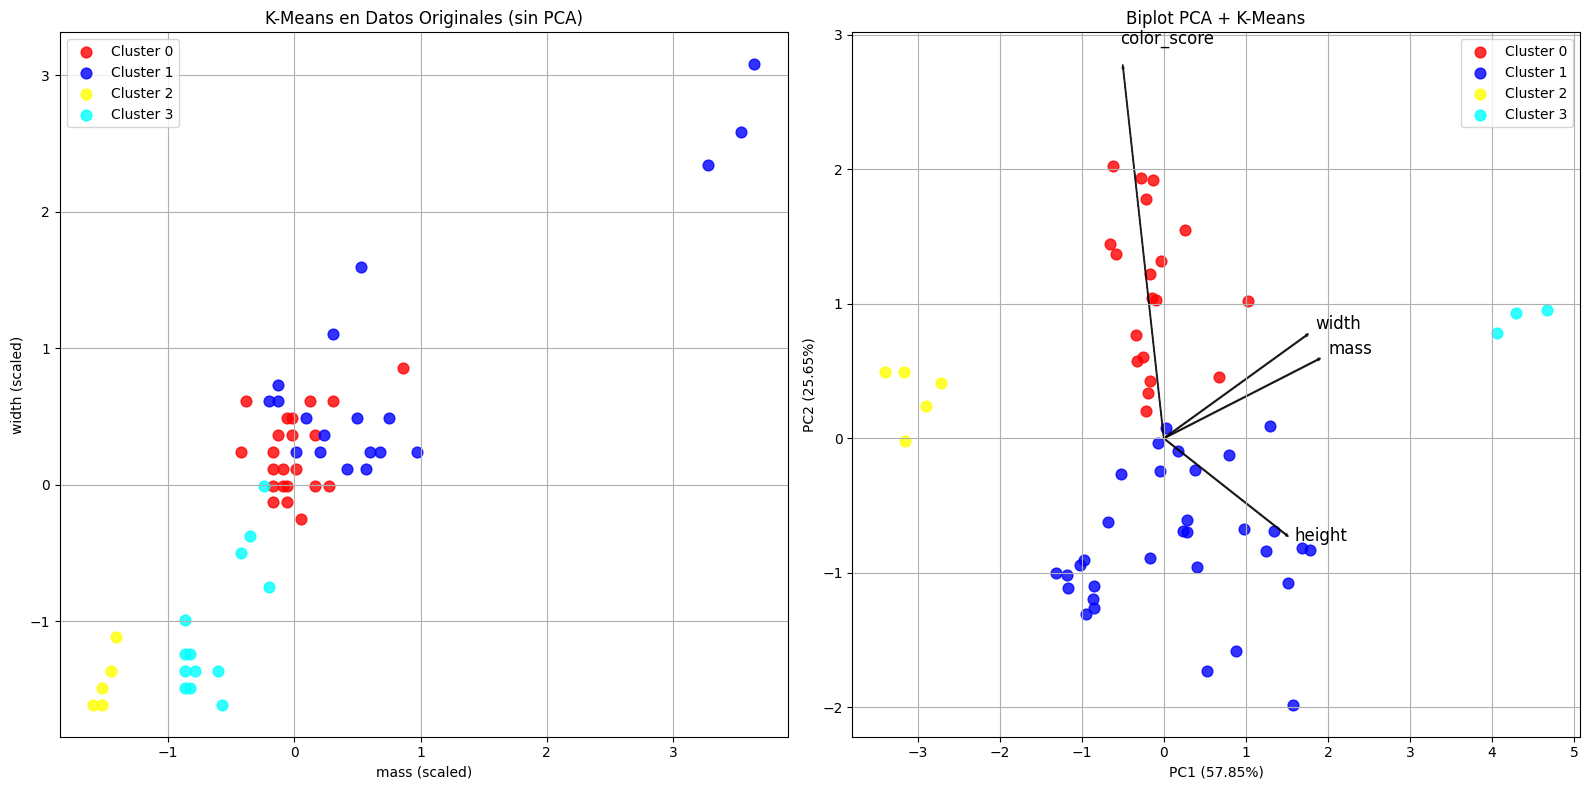

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
loadings = pca.components_.T
variables = X.columns

# --- K-means sin PCA ---
kmeans_original = KMeans(n_clusters=4, random_state=42)
frutas["cluster_original"] = kmeans_original.fit_predict(X_scaled)

# --- K-means con PCA ---
kmeans_pca = KMeans(n_clusters=4, random_state=42)
frutas["cluster_pca"] = kmeans_pca.fit_predict(X_pca)

# --- Colores para clusters de la grafica---
palette = ['red', 'blue', 'yellow', 'cyan', 'orange', 'brown']

# --- SUBPLOTS PARA PONER GRAFICAS DE LADO A LADO ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# SUBPLOT IZQUIERDO – Clústeres SIN PCA
ax = axes[0]  # Gráfico en Columna 1

for c in sorted(frutas["cluster_original"].unique()):
    ax.scatter(
        X_scaled[frutas["cluster_original"] == c, 0],
        X_scaled[frutas["cluster_original"] == c, 1],
        s=60,
        alpha=0.8,
        color=palette[c],
        label=f"Cluster {c}"
    )

ax.set_title("K-Means en Datos Originales (sin PCA)")
ax.set_xlabel("mass (scaled)")
ax.set_ylabel("width (scaled)")
ax.grid(True)
ax.legend()

# SUBPLOT DERECHO – Biplot con PCA + Clústeres
ax = axes[1]  # Gráfico en Columna 2

for c in sorted(frutas["cluster_pca"].unique()):
    ax.scatter(
        X_pca[frutas["cluster_pca"] == c, 0],
        X_pca[frutas["cluster_pca"] == c, 1],
        s=60,
        alpha=0.8,
        color=palette[c],
        label=f"Cluster {c}"
    )

# Flechas (loadings)
for i, var in enumerate(variables):
    ax.arrow(
        0, 0,
        loadings[i, 0] * 3,
        loadings[i, 1] * 3,
        color='black',
        width=0.007,
        alpha=0.8
    )
    ax.text(
        loadings[i, 0] * 3.2,
        loadings[i, 1] * 3.2,
        var,
        color='black',
        fontsize=12
    )

ax.set_title("Biplot PCA + K-Means")
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


## **Probando con parametro de Clusters = 5**

In [132]:
# --- Aplicamos K-Means con el k elegido (por ejemplo, 5) ---
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
frutas["cluster"] = clusters

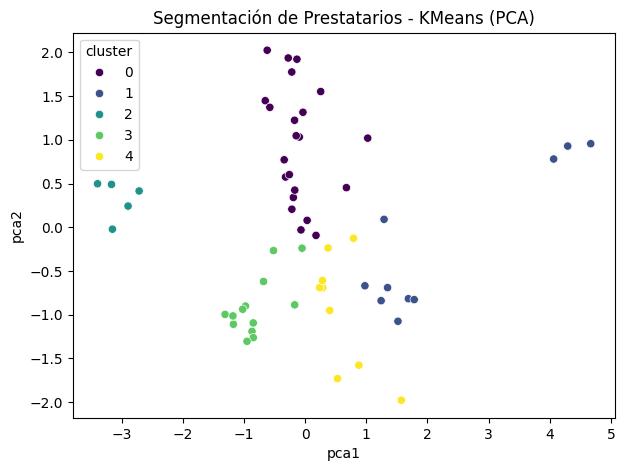

In [134]:
# --- Visualización PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
frutas["pca1"], frutas["pca2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=frutas, x="pca1", y="pca2", hue="cluster", palette="viridis")
plt.title("Segmentación de Prestatarios - KMeans (PCA)")
plt.show()